This notebook follows this [blog](https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57),  and datasets is from UCI Machine Learning

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

wines = pd.read_csv("../input/winequalityN.csv")
wines = wines.sample(frac = 1, random_state = 42).reset_index(drop = True)

## General Information

In [2]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7
1,white,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7
2,white,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6
3,white,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6
4,white,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5


In [3]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


#### Create quality label

In [5]:
wines["quality_label"] = wines["quality"].apply(lambda x: "low" 
                                     if x <= 5 else "medium"
                                     if x <= 7 else "high")
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,white,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,medium
1,white,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,medium
2,white,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,medium
3,white,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,medium
4,white,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,low


In [6]:
red_wine = wines[wines["type"] == "red"]
white_wine = wines[wines["type"] == "white"]

subset_attributes = ["residual sugar", "total sulfur dioxide", "sulphates", "alcohol",
                     "volatile acidity", "quality"]

rs = round(red_wine[subset_attributes].describe(), 2)
ws = round(white_wine[subset_attributes].describe(), 2)
pd.concat([rs, ws], axis = 1, keys = ["Red Wine Statistics", "White Wine Statistics"])

Red Wine Statistics          ...          White Wine Statistics
           residual sugar          ...                        quality
count             1599.00          ...                        4898.00
mean                 2.54          ...                           5.88
std                  1.41          ...                           0.89
min                  0.90          ...                           3.00
25%                  1.90          ...                           5.00
50%                  2.20          ...                           6.00
75%                  2.60          ...                           6.00
max                 15.50          ...                           9.00

[8 rows x 12 columns]

## Visualization data in 1-D

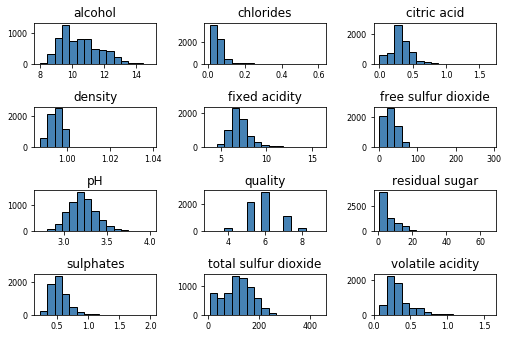

In [7]:
wines.hist(bins = 15, color = "steelblue", edgecolor = "black", linewidth = 1.0,
          xlabelsize = 8, ylabelsize = 8, grid = False)
plt.tight_layout(rect = (0, 0, 1.2, 1.2))

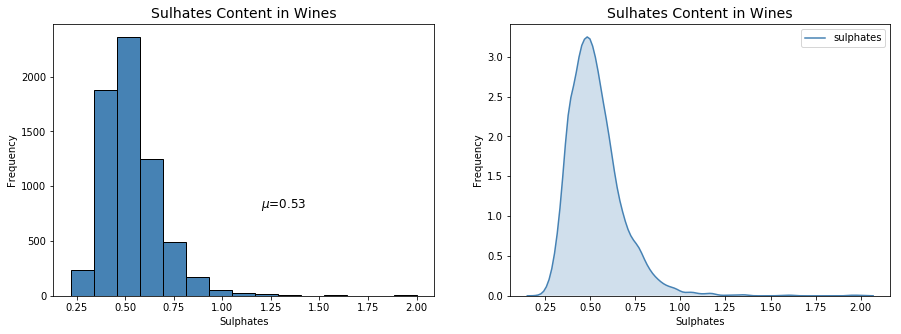

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.hist(wines["sulphates"].dropna(), color = "steelblue", bins = 15, 
         edgecolor = "black")
ax1.set_title("Sulhates Content in Wines", fontsize = 14)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")
ax1.text(1.2, 800, r"$\mu$=" + str(round(wines["sulphates"].mean(), 2)), fontsize = 12)

sns.kdeplot(wines["sulphates"].dropna(), ax = ax2, shade = True, color = "steelblue")
ax2.set_title("Sulhates Content in Wines", fontsize = 14)
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
plt.show()

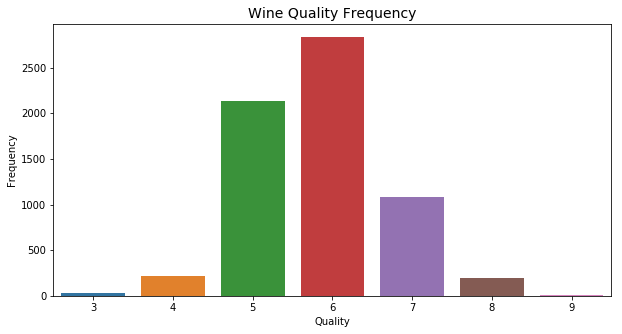

In [9]:
wine_quality = wines["quality"].value_counts()

plt.figure(figsize = (10, 5))
sns.barplot(wine_quality.index, wine_quality.values)
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.title("Wine Quality Frequency", fontsize = 14)
plt.show()

## Visualization data in 2-D

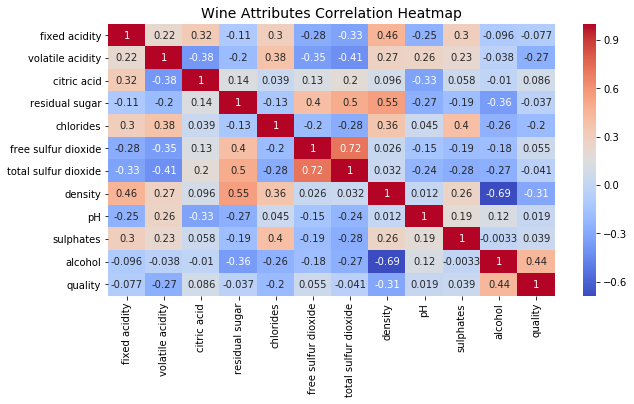

In [10]:
plt.figure(figsize = (10, 5))
wine_corr = wines.corr()
sns.heatmap(wine_corr, annot = True, cmap = "coolwarm")
plt.title("Wine Attributes Correlation Heatmap", fontsize = 14)
plt.show()

<Figure size 720x360 with 0 Axes>

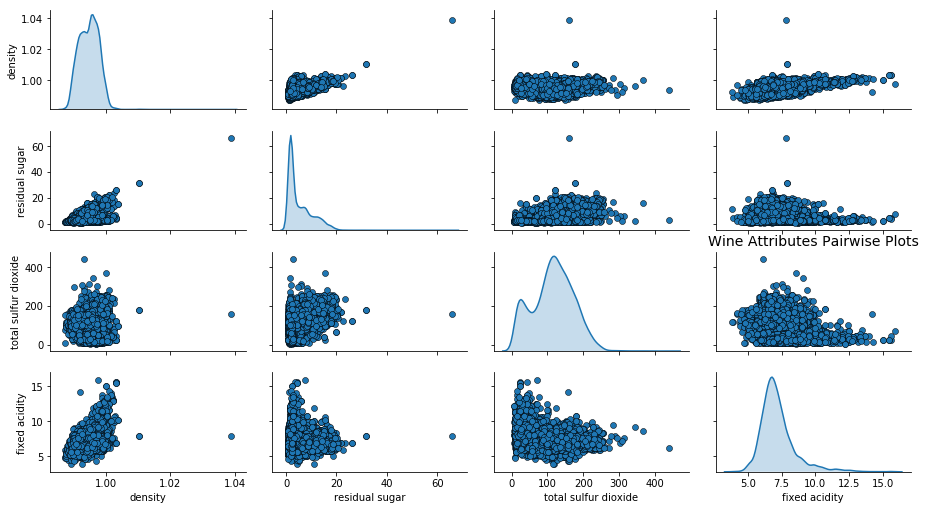

In [11]:
plt.figure(figsize = (10, 5))
sns.pairplot(wines[["density", "residual sugar", "total sulfur dioxide", "fixed acidity"]], 
             size = 1.8, aspect = 1.8,
             plot_kws = dict(edgecolor = "k", linewidth = 0.5),
             diag_kind = "kde", diag_kws = dict(shade = True))
plt.title("Wine Attributes Pairwise Plots", fontsize = 14)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

cols = ["density", "residual sugar", "total sulfur dioxide", "fixed acidity"]
subset_df = wines[cols]

ss = StandardScaler()
subset_df = ss.fit_transform(subset_df)
subset_df = pd.DataFrame(subset_df, columns = cols)

subset_df = pd.concat([subset_df, wines["type"]], axis = 1)
subset_df.head()

,density,residual sugar,total sulfur dioxide,fixed acidity,type
0,-1.352914,-0.660884,0.039907,-0.167030,white
1,-1.032748,-0.808012,-0.225498,0.295701,white
2,0.441351,1.167708,0.004519,-0.784004,white
3,0.654795,1.482983,0.712265,-0.398395,white
4,1.401850,2.596953,0.004519,-0.321274,white


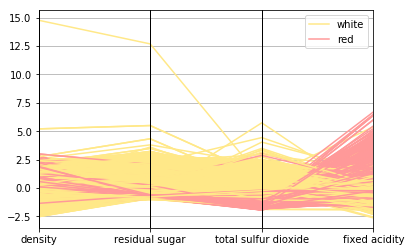

In [13]:
pd.plotting.parallel_coordinates(subset_df, "type", color = ("#FFE888", "#FF9999"))

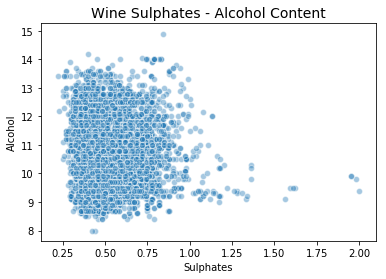

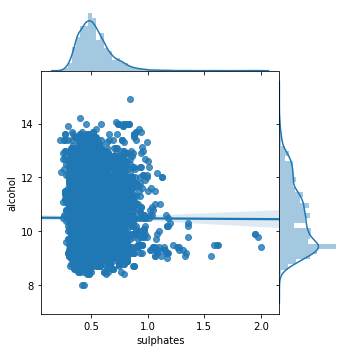

In [14]:
plt.scatter(wines["sulphates"], wines["alcohol"], alpha = 0.4, edgecolor = "w")
plt.title("Wine Sulphates - Alcohol Content", fontsize = 14)
plt.xlabel("Sulphates")
plt.ylabel("Alcohol")

sns.jointplot(wines["sulphates"], wines["alcohol"], kind = "reg", 
              space = 0, size = 5, ratio = 4)
plt.show()

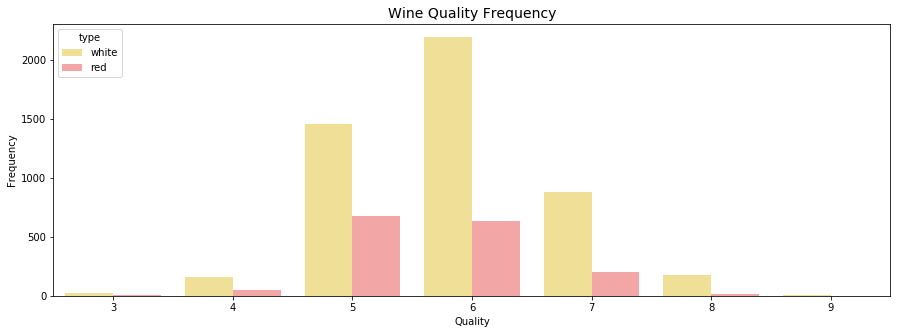

In [15]:
plt.figure(figsize = (15, 5))
sns.countplot(x = "quality", hue = "type", data = wines, palette = {"red": "#FF9999", "white": "#FFE888"})
plt.title("Wine Quality Frequency", fontsize = 14)
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

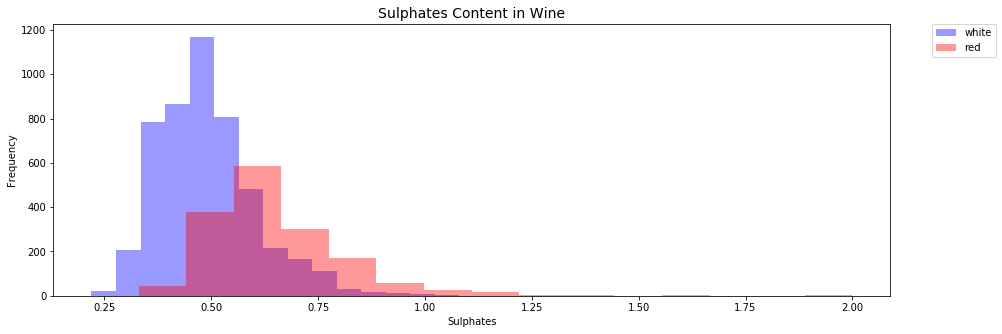

In [16]:
plt.figure(figsize = (15, 5))
sns.distplot(wines[wines["type"] == "white"]["sulphates"].dropna(), bins = 15, color = "b", 
             kde = False, label = "white")
sns.distplot(wines[wines["type"] == "red"]["sulphates"].dropna(), bins = 15, color = "r", 
             kde = False, label = "red")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.0)
plt.title("Sulphates Content in Wine", fontsize = 14)
plt.xlabel("Sulphates")
plt.ylabel("Frequency")
plt.show()

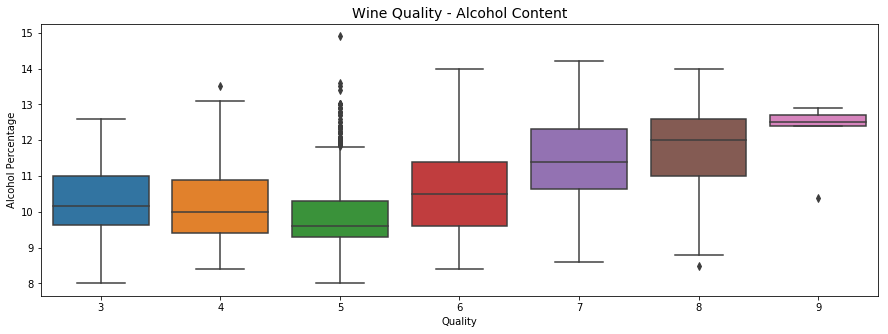

In [17]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = "quality", y = "alcohol", data = wines)
plt.title("Wine Quality - Alcohol Content", fontsize = 14)
plt.xlabel("Quality")
plt.ylabel("Alcohol Percentage")
plt.show()

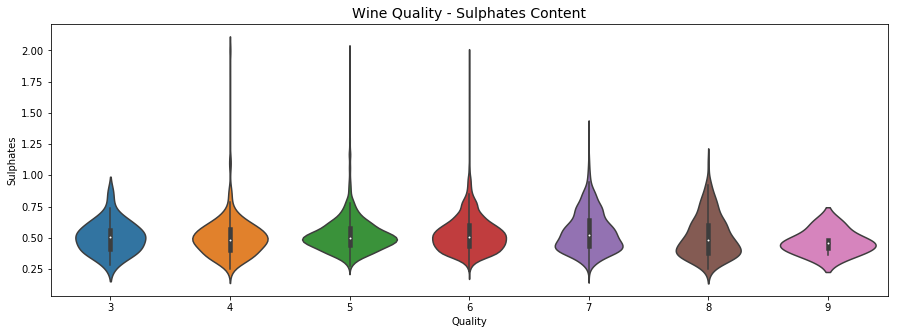

In [18]:
plt.figure(figsize = (15, 5))
sns.violinplot(x = "quality", y = "sulphates", data = wines)
plt.title("Wine Quality - Sulphates Content", fontsize = 14)
plt.xlabel("Quality")
plt.ylabel("Sulphates")
plt.show()

## Visualization data in 3-D

<Figure size 720x360 with 0 Axes>

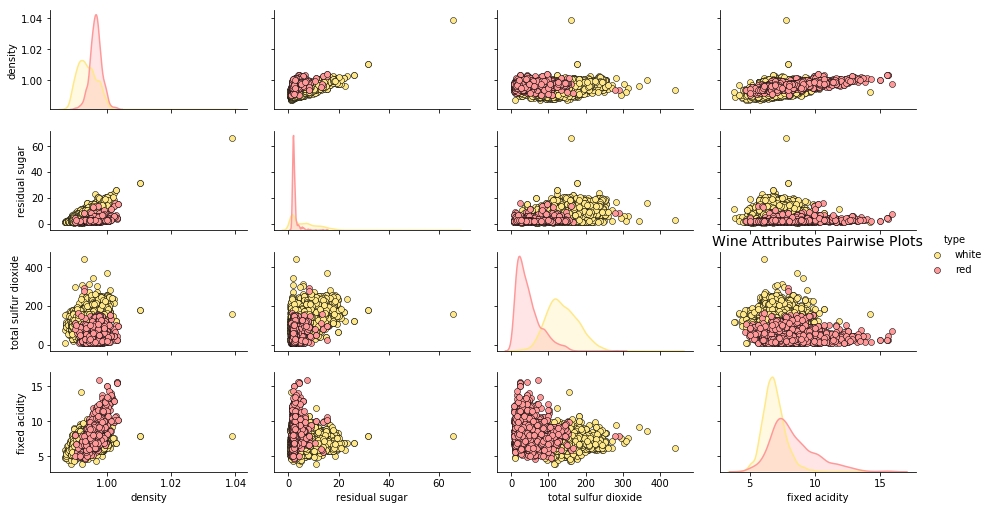

In [19]:
plt.figure(figsize = (10, 5))
sns.pairplot(wines[["density", "residual sugar", "total sulfur dioxide", "fixed acidity", "type"]], 
             hue = "type",
             size = 1.8, aspect = 1.8,
             palette = {"red": "#FF9999", "white": "#FFE888"},
             plot_kws = dict(edgecolor = "k", linewidth = 0.5))
plt.title("Wine Attributes Pairwise Plots", fontsize = 14)
plt.show()

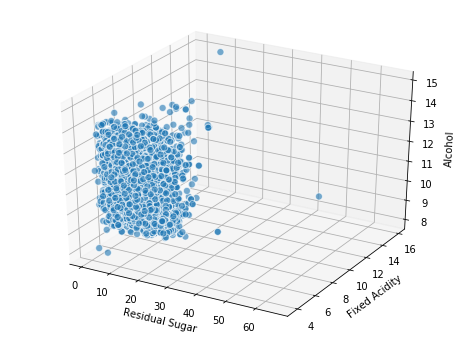

In [20]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = "3d")
xs = wines["residual sugar"]
ys = wines["fixed acidity"]
zs = wines["alcohol"]
ax.scatter(xs, ys, zs, s = 50, alpha = 0.6, edgecolor = "w")
ax.set_xlabel("Residual Sugar")
ax.set_ylabel("Fixed Acidity")
ax.set_zlabel("Alcohol")
plt.show()

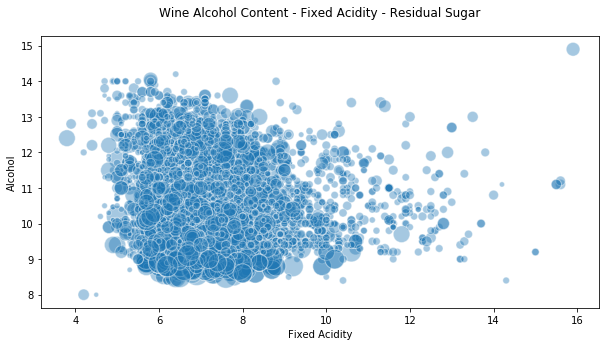

In [21]:
plt.figure(figsize = (10, 5))
plt.scatter(wines["fixed acidity"], wines["alcohol"], s = wines["residual sugar"]*25, alpha = 0.4, edgecolors = "w")
plt.title("Wine Alcohol Content - Fixed Acidity - Residual Sugar", y = 1.05)
plt.xlabel("Fixed Acidity")
plt.ylabel("Alcohol")
plt.show()

<Figure size 720x360 with 0 Axes>

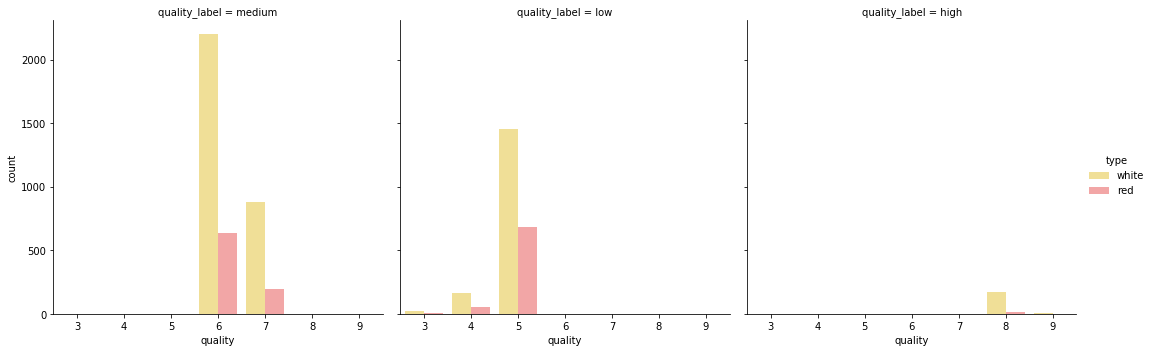

In [22]:
plt.figure(figsize = (10, 5))
sns.factorplot(x = "quality", hue = "type", col = "quality_label", 
               data = wines, kind = "count", palette = {"red": "#FF9999", "white": "#FFE888"})
plt.show()

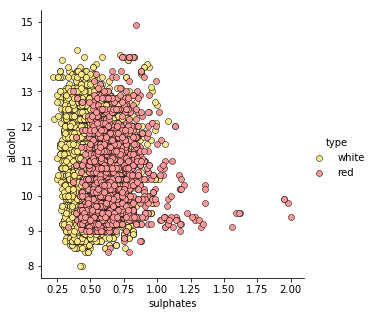

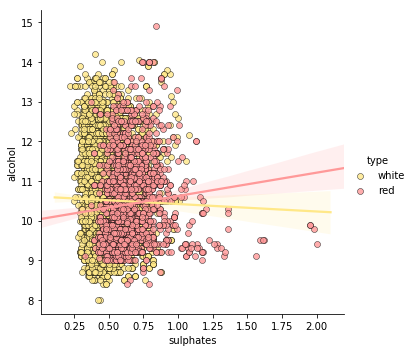

In [23]:
sns.pairplot(wines, x_vars = ["sulphates"], y_vars = ["alcohol"], size = 4.5,
            hue = "type", palette = {"red": "#FF9999", "white": "#FFE888"},
            plot_kws = dict(edgecolor = "k", linewidth = 0.5))

sns.lmplot(x = "sulphates", y = "alcohol", hue = "type", 
            palette = {"red": "#FF9999", "white": "#FFE888"},
            data = wines, fit_reg = True, legend = True, 
            scatter_kws = dict(edgecolor = "k", linewidth = 0.5))
plt.show()

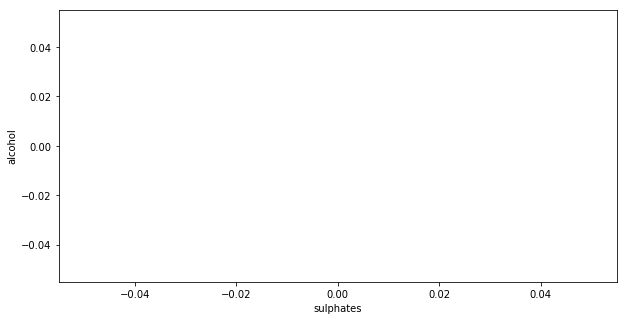

In [24]:
plt.figure(figsize = (10, 5))
sns.kdeplot(white_wine["sulphates"], white_wine["alcohol"],
            cmap = "YlOrBr", shade = True, shade_lowest = False)
sns.kdeplot(red_wine["sulphates"], red_wine["alcohol"],
            cmap = "Reds", shade = True, shade_lowest = False)
plt.show()

There is a bug in the current version of seaborn that kdeplot could't display with two variables.

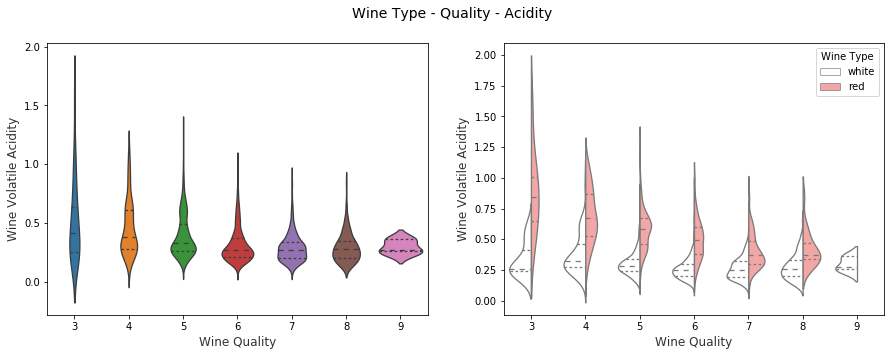

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle("Wine Type - Quality - Acidity", fontsize = 14)
sns.violinplot(x = "quality", y = "volatile acidity", 
               data = wines, inner = "quart", linewidth = 1.3, ax = ax[0])
ax[0].set_xlabel("Wine Quality", size = 12, alpha = 0.8)
ax[0].set_ylabel("Wine Volatile Acidity", size = 12, alpha = 0.8)

sns.violinplot(x = "quality", y = "volatile acidity", hue = "type",
               data = wines, split = True, inner = "quart", 
               linewidth = 1.3, palette={"red": "#FF9999", "white": "white"}, ax = ax[1])
ax[1].set_xlabel("Wine Quality", size = 12, alpha = 0.8)
ax[1].set_ylabel("Wine Volatile Acidity", size = 12, alpha = 0.8)

plt.legend(loc = "upper right", title = "Wine Type")
plt.show()

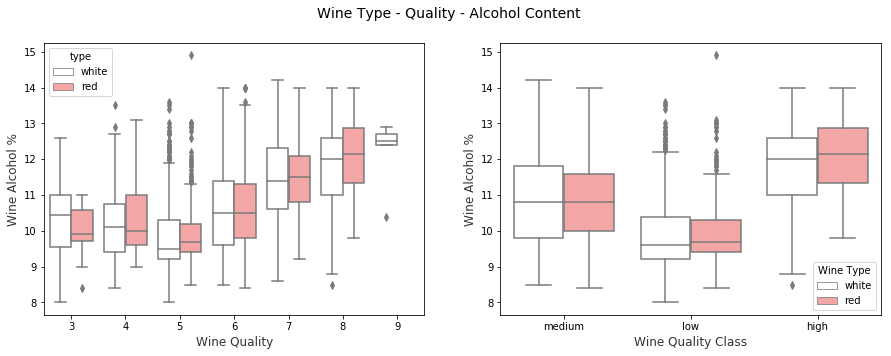

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle("Wine Type - Quality - Alcohol Content", fontsize = 14)
sns.boxplot(x = "quality", y = "alcohol", hue = "type",
            data = wines, palette={"red": "#FF9999", "white": "white"}, ax = ax[0])
ax[0].set_xlabel("Wine Quality", size = 12, alpha = 0.8)
ax[0].set_ylabel("Wine Alcohol %", size = 12, alpha = 0.8)

sns.boxplot(x = "quality_label", y = "alcohol", hue = "type",
            data = wines, palette={"red": "#FF9999", "white": "white"}, ax = ax[1])
ax[1].set_xlabel("Wine Quality Class", size = 12, alpha = 0.8)
ax[1].set_ylabel("Wine Alcohol %", size = 12, alpha = 0.8)

plt.legend(loc = "best", title = "Wine Type")
plt.show()

## Visualization data in 4-D

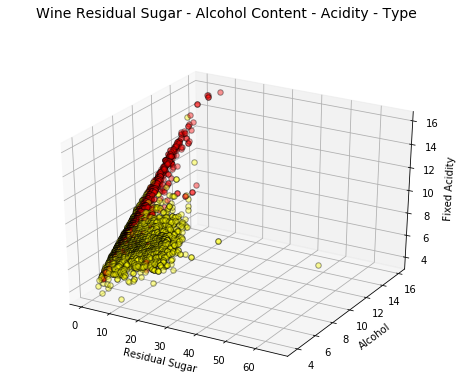

In [27]:
fig = plt.figure(figsize = (8, 6))
fig.suptitle("Wine Residual Sugar - Alcohol Content - Acidity - Type", fontsize = 14)
ax = fig.add_subplot(111, projection = "3d")

xs = list(wines["residual sugar"])
yx = list(wines["alcohol"])
zs = list(wines["fixed acidity"])

data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ["red" if wt == "red" else "yellow" for wt in list(wines["type"])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha = 0.4, c = color, edgecolors = "none", s = 30)
    
ax.set_xlabel("Residual Sugar")
ax.set_ylabel("Alcohol")
ax.set_zlabel("Fixed Acidity")
plt.show()

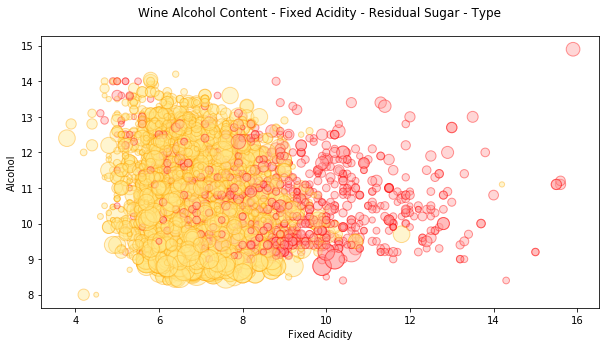

In [28]:
plt.figure(figsize = (10, 5))
size = wines["residual sugar"]*25

fill_colors = ["#FF9999" if wt == "red" else "#FFE888" for wt in list(wines["type"])]
edge_colors = ["red" if wt == "red" else "orange" for wt in list(wines["type"])]

plt.scatter(wines["fixed acidity"], wines["alcohol"], s = size, 
            alpha = 0.4, color = fill_colors, edgecolors = edge_colors)

plt.xlabel("Fixed Acidity")
plt.ylabel("Alcohol")
plt.title("Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type", y = 1.05)
plt.show()

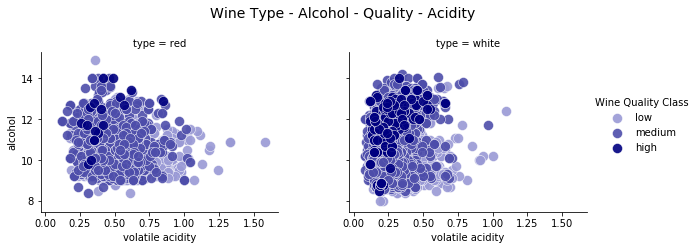

In [29]:
g = sns.FacetGrid(wines, col = "type", hue = "quality_label",
                col_order = ["red", "white"], hue_order = ["low", "medium", "high"],
                aspect = 1.2, size = 3.5, palette = sns.light_palette("navy", 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha = 0.9,
     edgecolor = "white", linewidth = 0.5, s = 100)

fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle("Wine Type - Alcohol - Quality - Acidity", fontsize = 14)
g.add_legend(title = "Wine Quality Class")
plt.show()

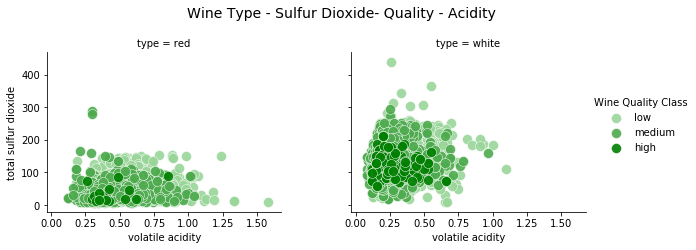

In [30]:
g = sns.FacetGrid(wines, col = "type", hue = "quality_label",
                col_order = ["red", "white"], hue_order = ["low", "medium", "high"],
                aspect = 1.2, size = 3.5, palette = sns.light_palette("green", 4)[1:])
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha = 0.9,
     edgecolor = "white", linewidth = 0.5, s = 100)

fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle("Wine Type - Sulfur Dioxide- Quality - Acidity", fontsize = 14)
g.add_legend(title = "Wine Quality Class")
plt.show()

## Visualization data in 5-D

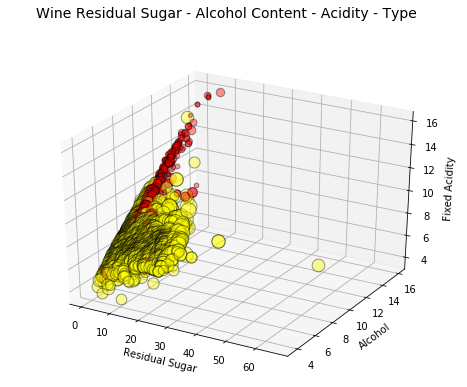

In [31]:
fig = plt.figure(figsize = (8, 6))
fig.suptitle("Wine Residual Sugar - Alcohol Content - Acidity - Type", fontsize = 14)
ax = fig.add_subplot(111, projection = "3d")

xs = list(wines["residual sugar"])
yx = list(wines["alcohol"])
zs = list(wines["fixed acidity"])

data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ["red" if wt == "red" else "yellow" for wt in list(wines["type"])]
ss = list(wines["total sulfur dioxide"])

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha = 0.4, c = color, edgecolors = "none", s = size)
    
ax.set_xlabel("Residual Sugar")
ax.set_ylabel("Alcohol")
ax.set_zlabel("Fixed Acidity")
plt.show()

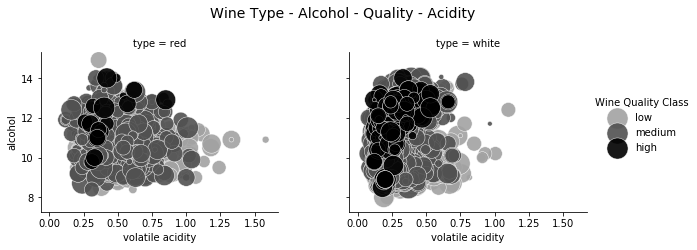

In [32]:
g = sns.FacetGrid(wines, col = "type", hue = "quality_label",
                col_order = ["red", "white"], hue_order = ["low", "medium", "high"],
                aspect = 1.2, size = 3.5, palette = sns.light_palette("black", 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha = 0.9,
     edgecolor = "white", linewidth = 0.5, s = wines["total sulfur dioxide"]*2)

fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle("Wine Type - Alcohol - Quality - Acidity", fontsize = 14)
g.add_legend(title = "Wine Quality Class")
plt.show()

## Visualization data in 6-D

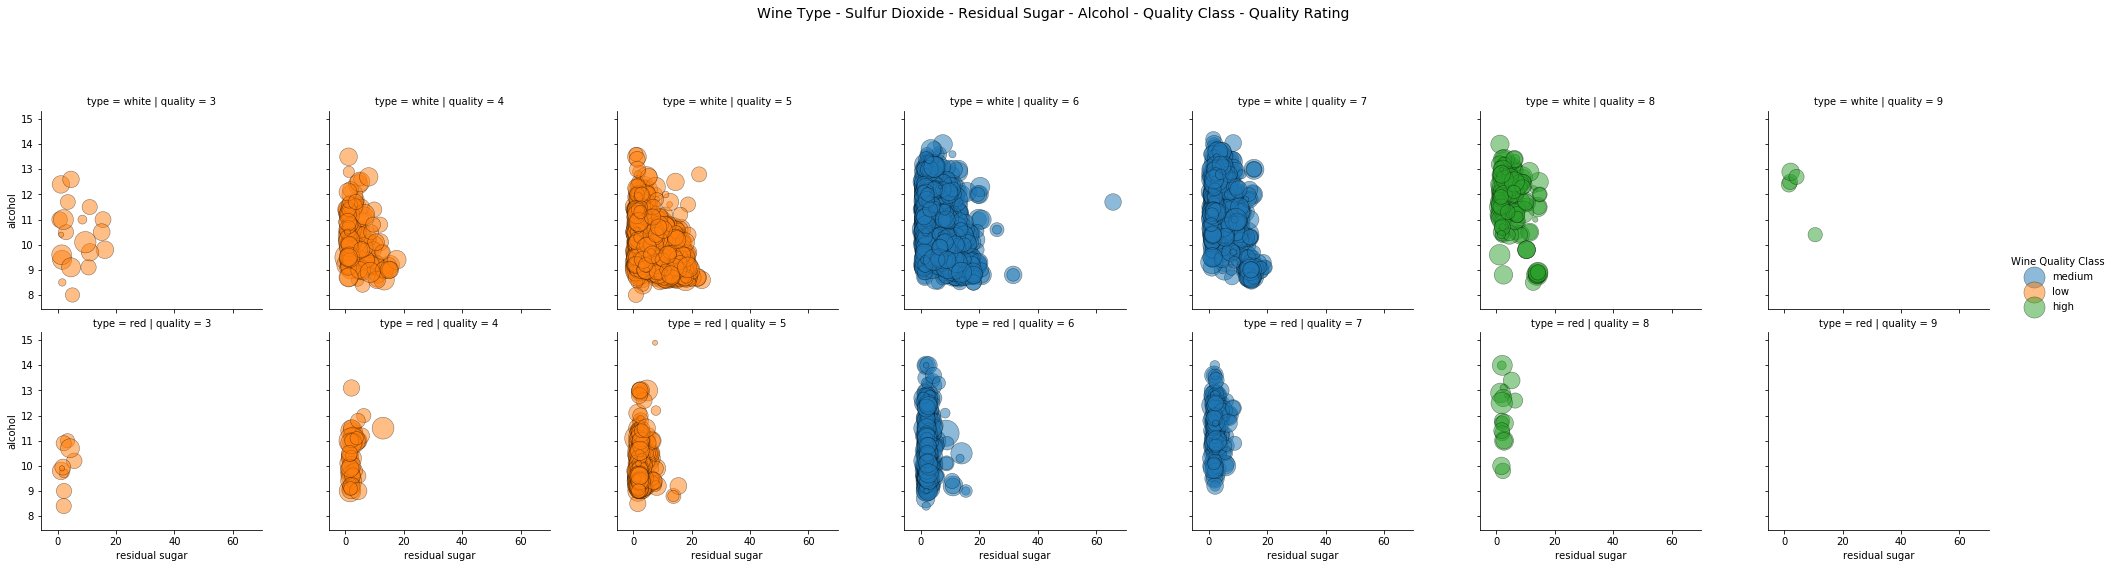

In [33]:
g = sns.FacetGrid(wines, row = "type", col = "quality", hue = "quality_label", size = 4)
g.map(plt.scatter, "residual sugar", "alcohol", alpha = 0.5,
     edgecolor = "k", linewidth = 0.5, s = wines["total sulfur dioxide"]*2)

fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle("Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating", fontsize = 14)
g.add_legend(title = "Wine Quality Class")
plt.show()